In [26]:
#import libraries
import os
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
from dotenv import load_dotenv
import hvplot.pandas
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from matplotlib import style
style.use("ggplot")

import os
import numpy as np
import pandas as pd
import random

In [4]:
#pull in data from previously pulled news articles sentiments 
data = Path('news_sentiment.csv')
news_sentiment_df = pd.read_csv(data, index_col=0)
news_sentiment_df.head()

,vote_avg,protest_avg,election_avg
2021-01-11,-0.042335,-0.039450,0.021515
2021-01-10,-0.061795,-0.258725,-0.047390
2021-01-09,-0.178465,-0.143980,-0.182350
2021-01-08,-0.147315,-0.362070,-0.153045
2021-01-07,-0.338450,-0.361915,-0.238405


In [5]:
twitter_data = Path('TWTR.csv')
twitter_df = pd.read_csv(twitter_data, index_col=0)
twitter_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,46.700001,51.740002,46.540001,51.209999,51.209999,24147200
2020-12-11,50.619999,52.450001,49.970001,51.439999,51.439999,18020200
2020-12-14,51.970001,53.480000,51.799999,52.020000,52.020000,17418200
2020-12-15,52.020000,52.959999,51.610001,52.820000,52.820000,10868700
2020-12-16,54.770000,56.110001,53.639999,54.029999,54.029999,29099400


In [6]:
facebook_data = Path('FB.csv')
facebook_df = pd.read_csv(facebook_data, index_col=0)
facebook_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-10,201.660004,202.050003,200.149994,200.869995,200.869995,9475700
2019-12-11,200.279999,202.630005,200.279999,202.259995,202.259995,8036800
2019-12-12,202.350006,203.660004,194.100006,196.750000,196.750000,23734800
2019-12-13,196.399994,196.800003,193.169998,194.110001,194.110001,18798000
2019-12-16,195.270004,199.119995,194.809998,197.919998,197.919998,14911500


In [7]:
#Get percent returns on the closing price, drop other values 
twitter_df = twitter_df["Close"]
twitter_returns = twitter_df.pct_change().dropna()
twitter_returns = pd.DataFrame(twitter_returns)
twitter_returns.rename(columns = {"Close":"TWTR"}, inplace = True)
twitter_returns

,TWTR
Date,
2020-12-11,0.004491
2020-12-14,0.011275
2020-12-15,0.015379
2020-12-16,0.022908
2020-12-17,0.011105
2020-12-18,0.022698
2020-12-21,-0.022015
2020-12-22,0.004941
2020-12-23,-0.011109


In [8]:
facebook_df = facebook_df["Close"]
facebook_returns = facebook_df.pct_change().dropna()
facebook_returns = pd.DataFrame(facebook_returns)
facebook_returns.rename(columns = {"Close":"FB"}, inplace = True)
facebook_returns

,FB
Date,
2019-12-11,0.006920
2019-12-12,-0.027242
2019-12-13,-0.013418
2019-12-16,0.019628
2019-12-17,0.002375
...,...
2021-01-05,0.007548
2021-01-06,-0.028269
2021-01-07,0.020622


In [9]:
stock_sentiment = news_sentiment_df.join(twitter_returns, how='inner')
stock_sentiment = stock_sentiment.join(facebook_returns, how='inner')
stock_sentiment

,vote_avg,protest_avg,election_avg,TWTR,FB
2021-01-11,-0.042335,-0.039450,0.021515,-0.064103,-0.040102
2021-01-08,-0.147315,-0.362070,-0.153045,-0.016243,-0.004354
2021-01-07,-0.338450,-0.361915,-0.238405,-0.017461,0.020622
2021-01-06,0.058345,-0.271630,-0.054620,-0.011507,-0.028269
2021-01-05,-0.099680,-0.307570,-0.004395,-0.011920,0.007548
2021-01-04,0.076610,-0.164505,-0.064460,0.007017,-0.015449
2020-12-31,-0.136875,-0.311000,-0.077385,-0.003313,0.004745
2020-12-30,-0.036210,-0.151215,-0.067085,-0.000552,-0.017740
2020-12-29,0.281975,-0.111845,-0.002515,-0.001286,-0.000794
2020-12-28,-0.008520,-0.196625,0.017560,0.008523,0.035901


In [16]:
stock_sentiment.to_csv("sentiment_stock_data.csv")

In [42]:
stock_sentiment.corr().style.background_gradient()

,vote_avg,protest_avg,election_avg,TWTR,FB
vote_avg,1.000000,0.547732,0.264692,0.389354,-0.123198
protest_avg,0.547732,1.000000,-0.128203,-0.127300,-0.380359
election_avg,0.264692,-0.128203,1.000000,-0.082787,-0.003378
TWTR,0.389354,-0.127300,-0.082787,1.000000,0.472059
FB,-0.123198,-0.380359,-0.003378,0.472059,1.000000


In [33]:
X = stock_sentiment.drop(["TWTR","FB"], axis=1)
y = stock_sentiment.TWTR


In [44]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [46]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(stock_sentiment, window_size, feature_column, target_column)

In [47]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [50]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [51]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[2.66468715]
  [2.22510637]
  [1.42477037]]

 [[2.22510637]
  [1.42477037]
  [3.08626263]]

 [[1.42477037]
  [3.08626263]
  [2.42456751]]

 [[3.08626263]
  [2.42456751]
  [3.16274332]]

 [[2.42456751]
  [3.16274332]
  [2.26882159]]] 

X_test sample values:
[[[3.03668522]
  [2.76346512]
  [2.43149746]]

 [[2.76346512]
  [2.43149746]
  [2.47766224]]

 [[2.43149746]
  [2.47766224]
  [3.32028978]]

 [[2.47766224]
  [3.32028978]
  [2.48069802]]

 [[3.32028978]
  [2.48069802]
  [3.31367388]]]


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [53]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 15
dropout_fraction = 0.3

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Layer 3
#model.add(LSTM(units=number_units))
#model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [54]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 15)             1020      
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 15)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 2,896
Trainable params: 2,896
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, epochs=15, shuffle=False, batch_size=7, verbose=1)

Epoch 1/15
2/2 [==============================] - 7s 5ms/step - loss: 110.3774
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 109.3121
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 108.8417
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 107.7450
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 107.0620
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 107.3216
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 106.6038
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 105.6234
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 105.2385
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 102.9770
Epoch 11/15
2/2 [==============================] - 0s 8ms/step - loss: 104.3088
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 103.3810
Epoch 13/15
2/2 [==============================] 

In [57]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 103.8814


103.88136291503906

In [58]:
predicted = model.predict(X_test)

In [59]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [62]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = stock_sentiment.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
2020-12-18,2.686345,-0.181811
2020-12-17,2.563637,-0.189148
2020-12-16,1.175216,-0.188529
2020-12-15,4.521264,-0.184062
2020-12-14,2.390770,-0.175936


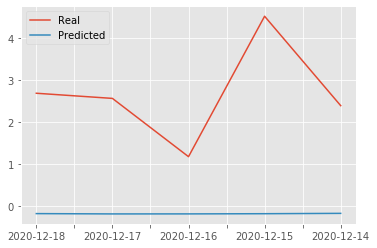

In [63]:
stocks.plot()